In [1]:
import numpy as np
import math as m
import random as rnd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import *

## S($\alpha$, $\beta$; 1)

In [2]:
def generate_Z(alpha, beta, size):
    W = np.random.exponential(1, size=size)
    theta = np.random.uniform(-np.pi/2, np.pi/2, size=size)
    theta0 = np.arctan(beta*np.tan((np.pi*alpha)/2))/alpha
    if alpha != 1:
        return (np.sin(alpha*(theta0 + theta)))/(((np.cos(alpha*theta0)*np.cos(theta)))**(1/alpha))*(np.cos(alpha*theta0 + (alpha-1)*theta)/W)**((1-alpha)/alpha)
    if alpha == 1:
        return (2/np.pi)*((np.pi/2 + beta*theta)*np.tan(theta) - beta*np.log((np.pi/2 * W * np.cos(theta)))/(np.pi/2 + beta*theta)) 

In [ ]:
def stable(alpha,beta,gamma,delta):
    u = r.uniform(-m.pi/2, m.pi/2)
    w = np.random.exponential(1)
    theta = (m.atan(beta*m.tan(m.pi*alpha/2)))/alpha
    if alpha == 1:
        Z = 2/m.pi*((m.pi/2+beta*u)*m.tan(u)-beta*m.log((m.pi/2*w*m.cos(u))/(m.pi/2+beta*u)))
        X = gamma*Z+delta

    else:
        Z = m.sin(alpha*(theta+u))/(m.cos(u)*m.cos(alpha*theta))**(1/alpha)*(m.cos(alpha*theta+alpha*u-u)/w)**((1-alpha)/alpha)
        X = gamma*(Z-beta*m.tan(m.pi*alpha/2))+delta
    return X

In [ ]:
Z = generate_Z(2,1,10)

In [ ]:
print(Z)

In [ ]:
print(np.arctan(1))

## S($\alpha$, $\beta$, $\gamma$, $\delta$; 1)

In [3]:
def alpha_stable1(alpha, beta, gamma, delta, size):
    Z = generate_Z(alpha, beta, size)
    if alpha != 1:
        return gamma*Z + delta
    else:
        return gamma*Z + (delta + beta*(2/np.pi)*np.log(gamma)) #bez gammy

In [4]:
X = alpha_stable1(2,0,1,0,100000)

In [ ]:
print(X)

## S($\alpha$, $\beta$, $\gamma$, $\delta$; 0)

In [5]:
def alpha_stable0(alpha, beta, gamma, delta, size):
    Z = generate_Z(alpha, beta, size)
    if alpha != 1:
        return gamma*(Z - beta*np.tan(alpha*np.pi/2)) + delta
    else:
        return gamma*Z + delta

## S(2,0,1,0; 1)

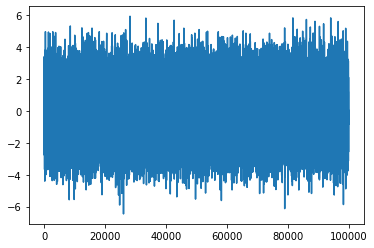

In [6]:
plt.plot(X)

In [7]:
means = [np.mean(X[:n]) for n in range(1,len(X))]

In [ ]:
print(means[-1])

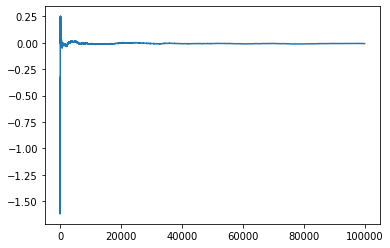

In [8]:
plt.plot(means)

In [9]:
def generate_comparison_plot(func, z_vector, type_, x_min, x_max, plot_histogram = False, y_scale='linear', x_scale='linear', loc = 0, scale = 1):
    x = np.linspace(x_min, x_max, 10000)
    theory_func = func.cdf if type_ == 'CDF' else func.pdf if type_ == 'PDF' else 0
    plot_empirical_func = sns.ecdfplot if type_ == 'CDF' else sns.kdeplot if type_ == 'PDF' else 0

    fig, ax = plt.subplots(figsize=(12,8))
    sns.lineplot(x=x, y=theory_func(x, loc, scale), ax=ax)
    if (type_ == "PDF") and (plot_histogram):
        sns.histplot(z_vector, color="green", ax=ax, stat="density")
    plot_empirical_func(z_vector, ax=ax)
    plt.title(f'Comparison of ${type_}s$')
    plt.yscale(y_scale)
    plt.xscale(x_scale)
    plt.xlim((x_min, x_max))
    plt.show()
    return fig

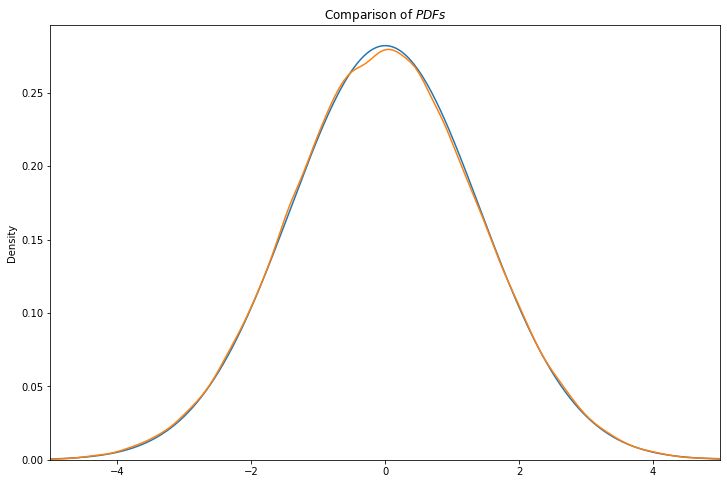

In [15]:
plot1 = generate_comparison_plot(norm, X,'PDF', -5, 5, loc=0, scale=np.sqrt(2))

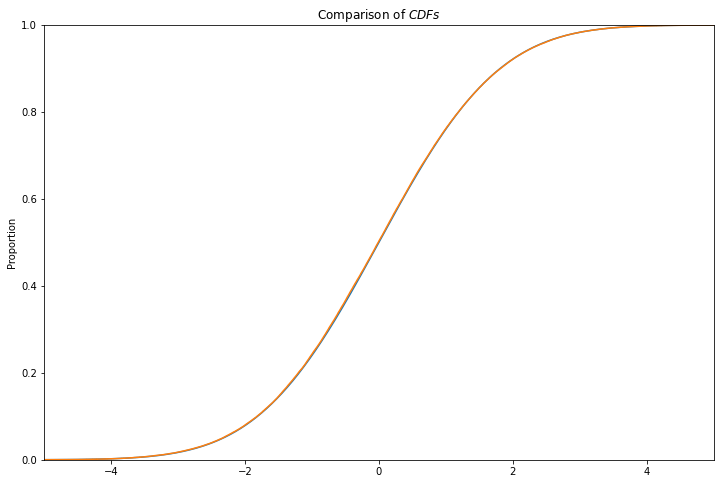

In [16]:
plot2 = generate_comparison_plot(norm, X,'CDF', -5, 5, loc=0, scale=np.sqrt(2))

## Special case: Cauchy distribution S(1,0,1,0; 1)

In [25]:
C = alpha_stable1(1,0,1,0,1000)

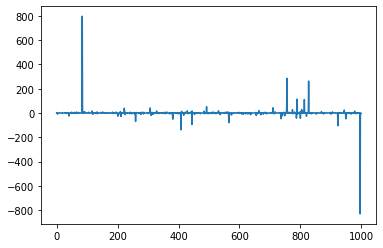

In [26]:
plt.plot(C)

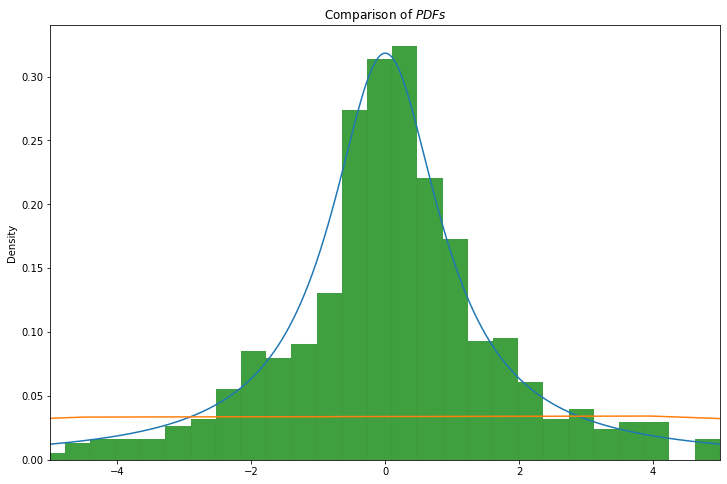

In [27]:
plot3 = generate_comparison_plot(cauchy, C, 'PDF', -5, 5, loc = 0, scale = 1, plot_histogram=True)

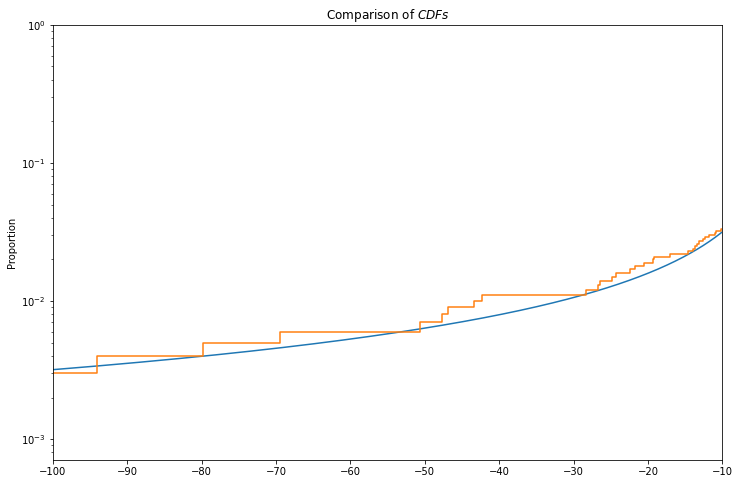

In [47]:
plot4 = generate_comparison_plot(cauchy, C, 'CDF', -100, -10, x_scale="linear", y_scale="log")

# Exercise 1

In [29]:
def alpha_stable(alpha, beta, gamma, delta, size, k):
    Z = generate_Z(alpha, beta, size)
    if k == 1:
        return alpha_stable1(alpha, beta, gamma, delta, size)
    elif k == 0:
        return alpha_stable0(alpha, beta, gamma, delta, size)

# To do:
 - dodatkowy arg do plotowania funkcji na danym przedziale (do porównania ogonu)
 - plotowanie funkcji charakterystycznej
 - porównanie momentów (funkcja)
